# Medical Cost Personal Insurance Project 

Project Description 

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated . 

Columns                                             

age: age of primary beneficiary 

sex: insurance contractor gender, female, male 

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 

children: Number of children covered by health insurance / Number of dependents 

smoker: Smoking 

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 

charges: Individual medical costs billed by health insurance 

# Importing Dependencies 

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [68]:
#Read DataFrame
df = pd.read_csv('medical_cost_insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

# Feature Engineering

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [6]:
#Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
#Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

# Numeric Approach

In [8]:
#Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
497,45,male,28.700,2,no,southwest,8027.96800,overweight
294,25,male,26.800,3,no,southwest,3906.12700,overweight
185,36,male,41.895,3,yes,northeast,43753.33705,obese
1097,22,male,33.770,0,no,southeast,1674.63230,obese
189,29,female,32.110,2,no,northwest,4922.91590,obese
711,50,female,23.540,2,no,southeast,10107.22060,normal
415,43,female,35.640,1,no,southeast,7345.72660,obese
1018,54,female,35.815,3,no,northwest,12495.29085,obese
748,47,female,36.000,1,no,southwest,8556.90700,obese
594,41,male,40.260,0,no,southeast,5709.16440,obese


In [9]:
#Describe Categorical Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [10]:
#Describe Numerical Values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [12]:
#Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [13]:
#Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [14]:
#Check Children Feature
df.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [15]:
#Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

# Data Visualization

# Univariate Analysis

# Box Plot

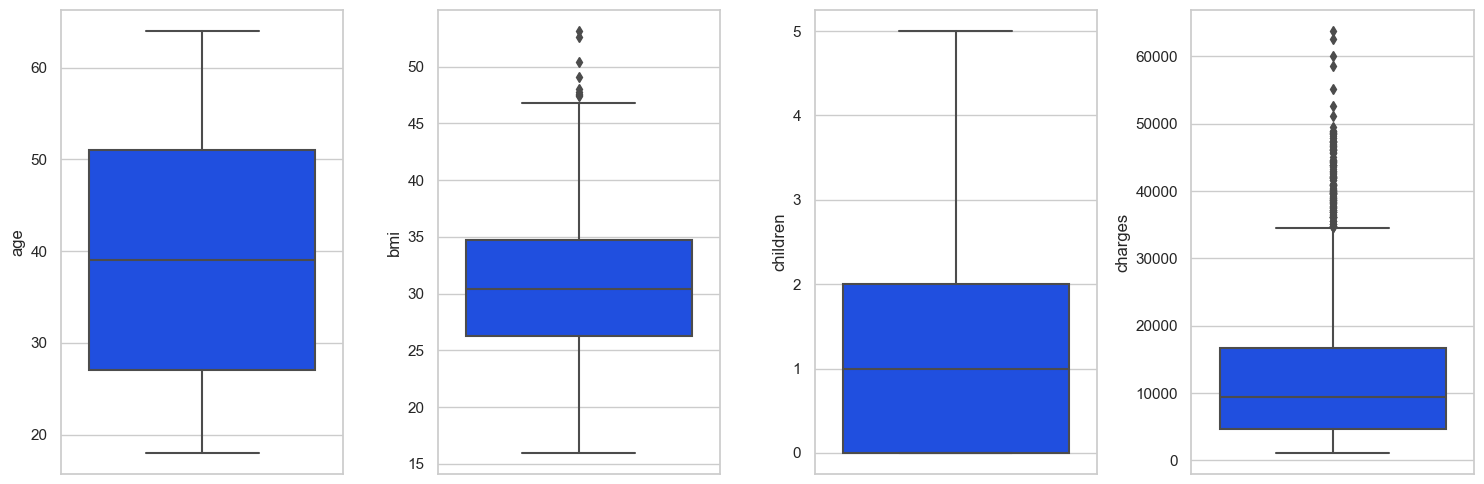

In [16]:
#Boxplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

# KDE Plot

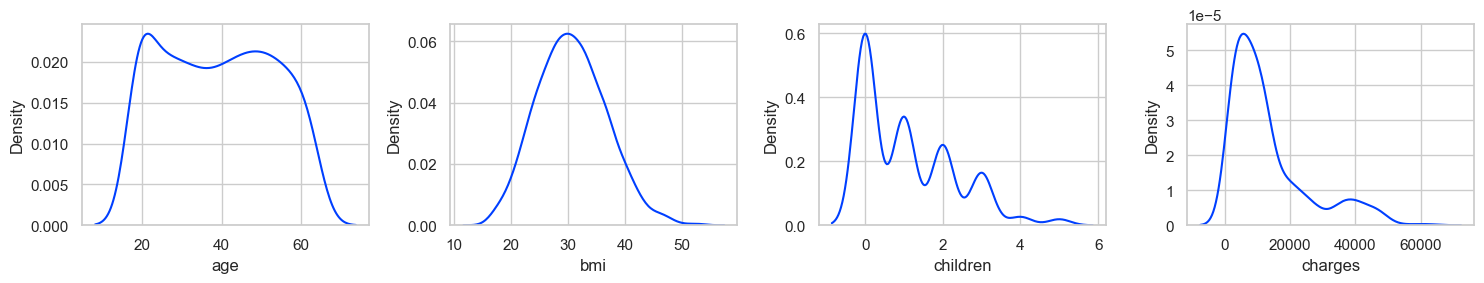

In [17]:
#KDEplot Visual
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

# Hist Plot

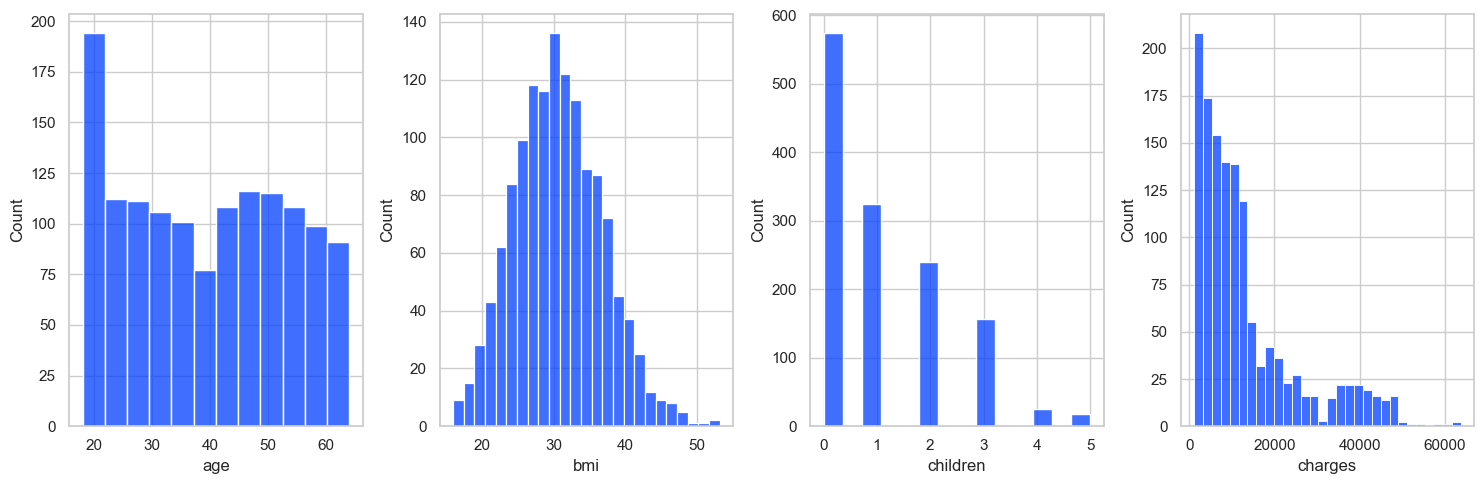

In [18]:
#Histplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

# Count Plot

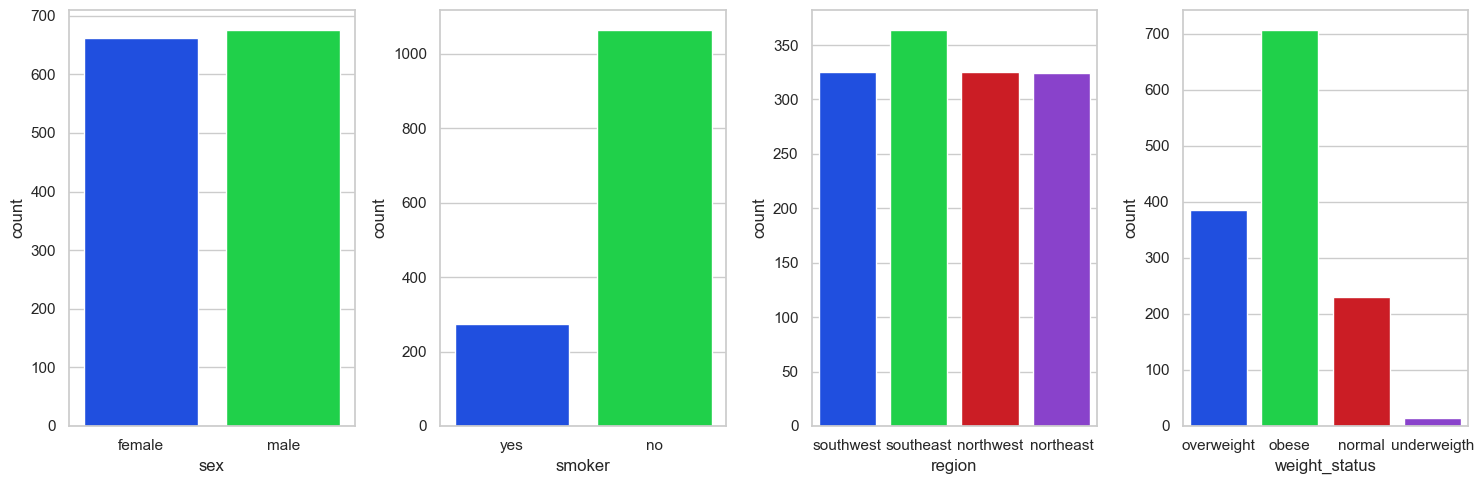

In [19]:
#Countplot Visual
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

# Multivariate Analysis

# Heat Map

<AxesSubplot:>

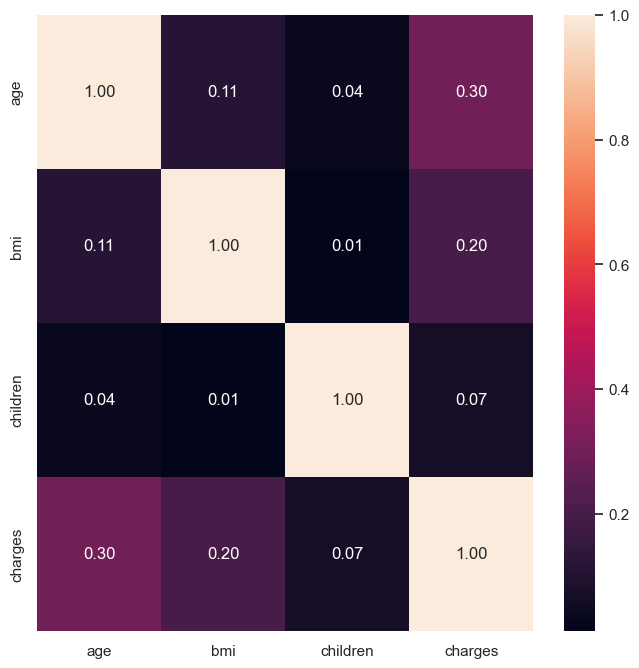

In [20]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

# Pair Plot

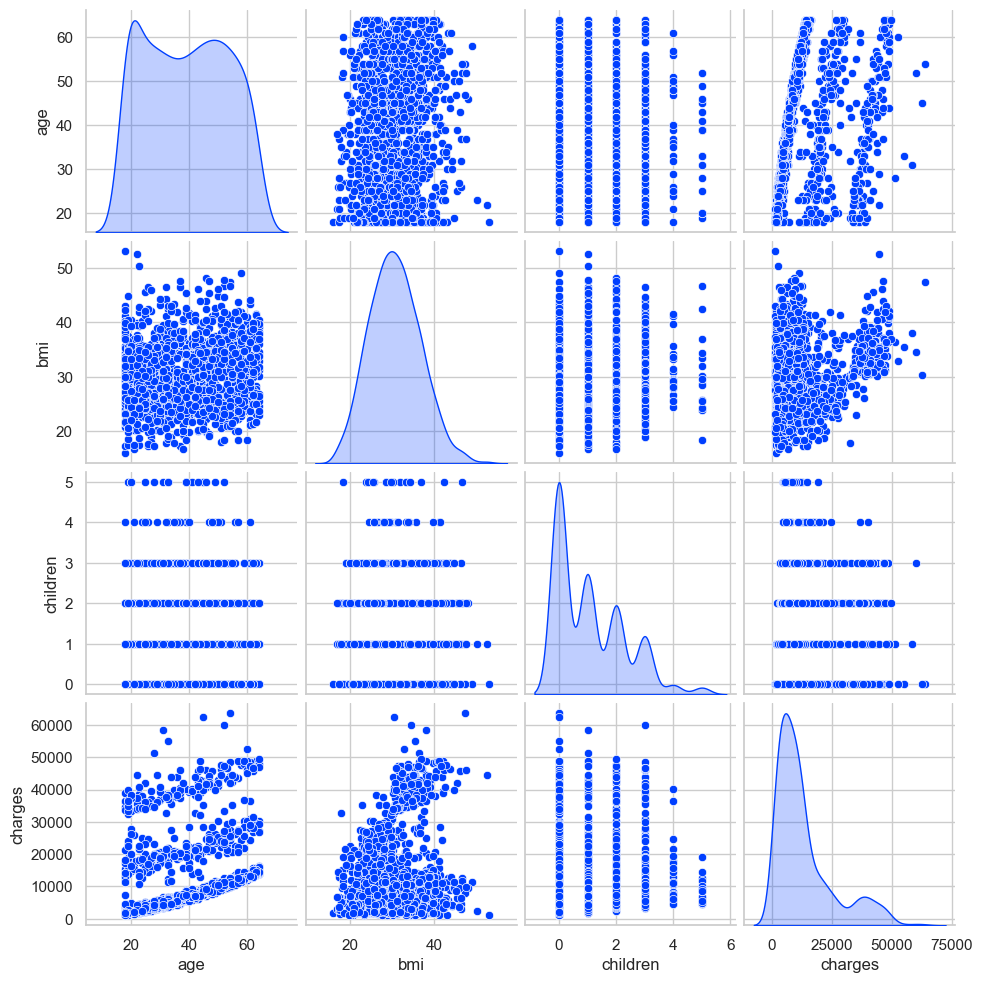

In [21]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

# Scatter Plot

<AxesSubplot:xlabel='bmi', ylabel='charges'>

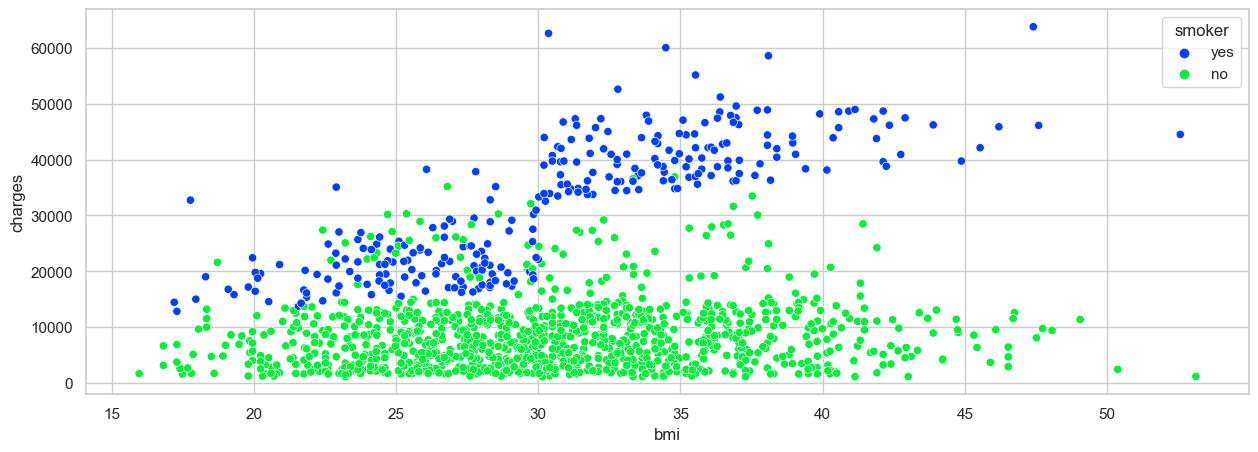

In [22]:
#Scatterplor Visualization
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

<AxesSubplot:xlabel='age', ylabel='charges'>

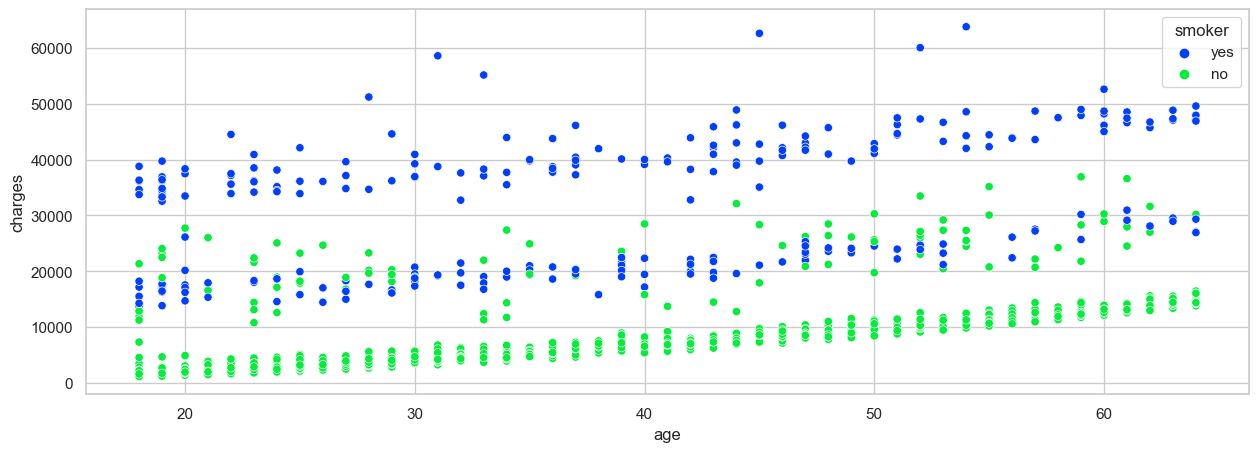

In [23]:
#Scatterplor Visualization
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

# Bar Plot

In [24]:
#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<AxesSubplot:xlabel='region', ylabel='charges'>

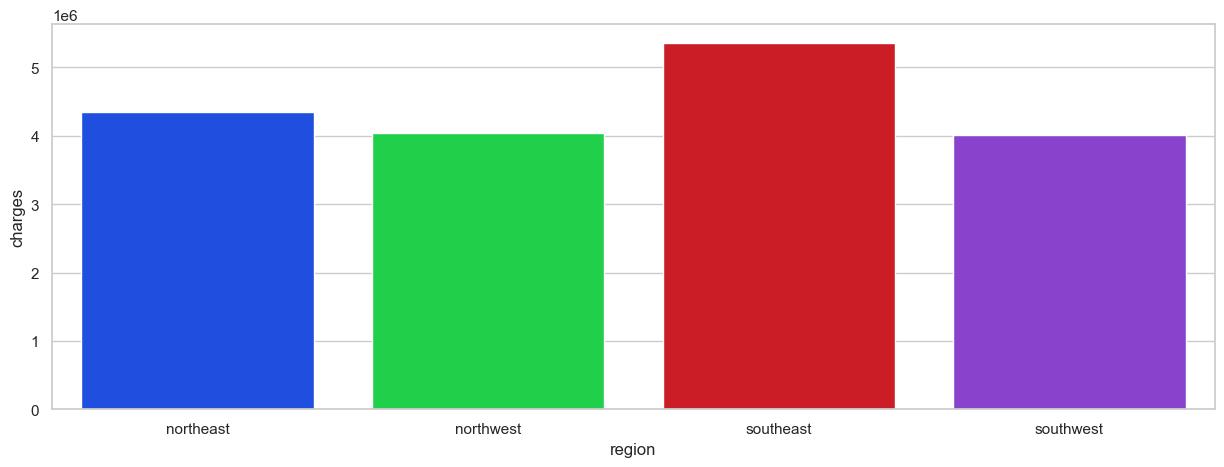

In [25]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

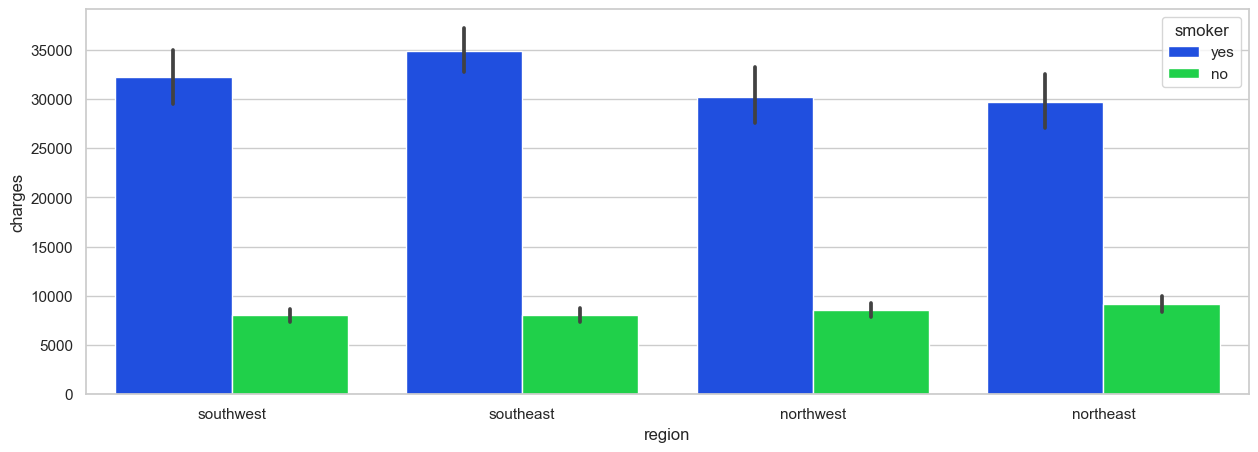

In [26]:
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

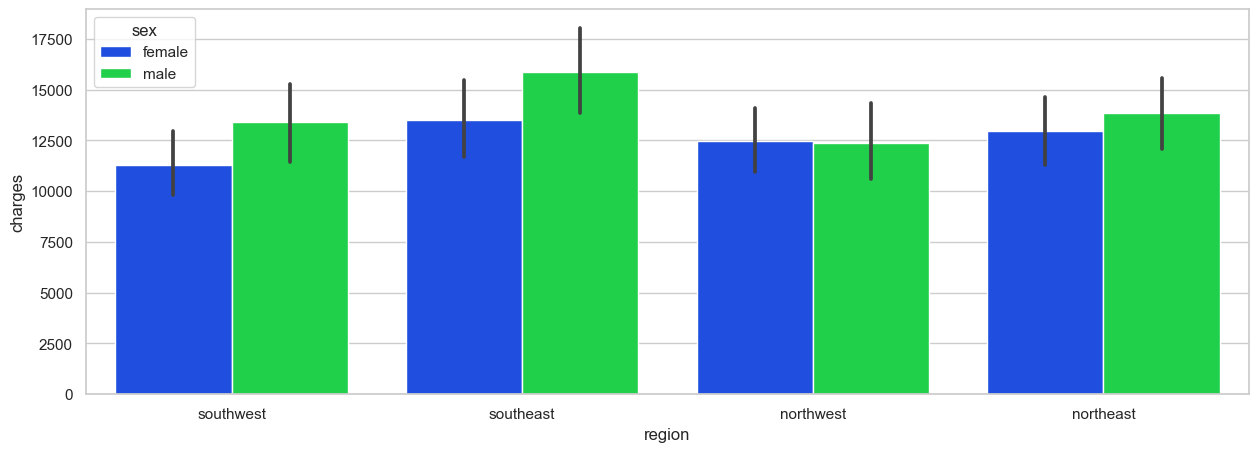

In [27]:
#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [28]:
#Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


<AxesSubplot:xlabel='sex', ylabel='count'>

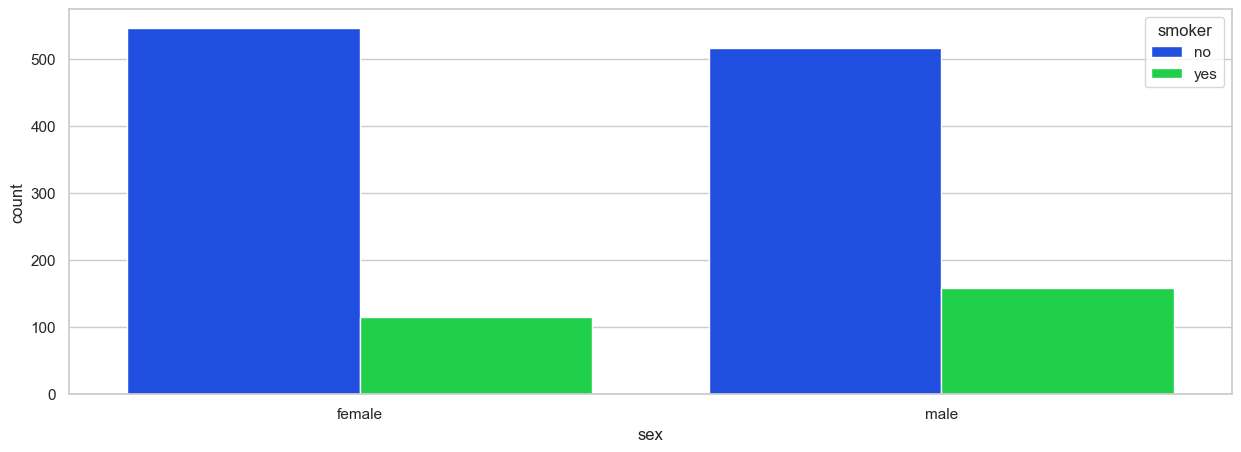

In [29]:
#Barplot Visualization
sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)

<AxesSubplot:xlabel='children', ylabel='charges'>

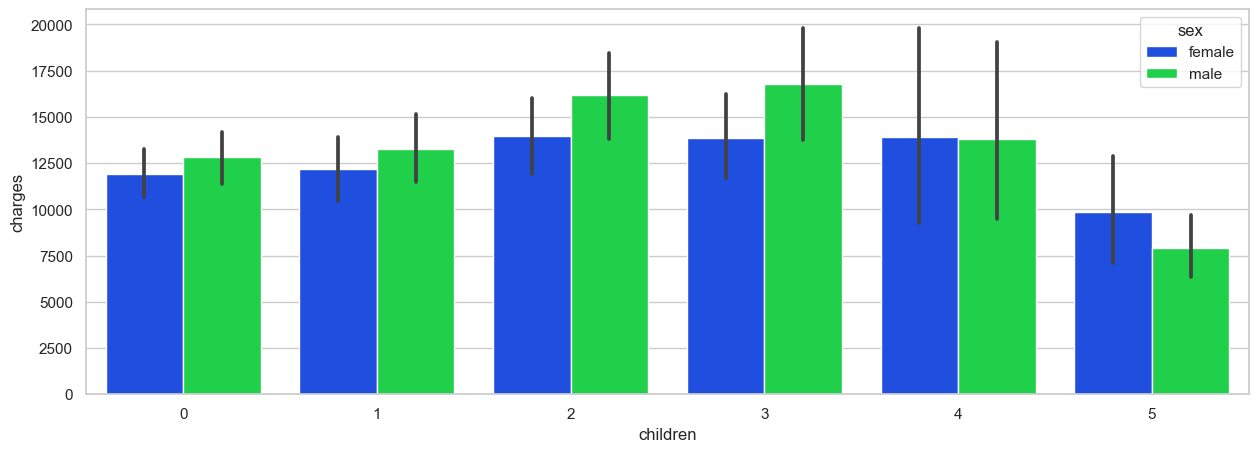

In [30]:
#Barplot with Hue Sex
sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

<AxesSubplot:xlabel='children', ylabel='charges'>

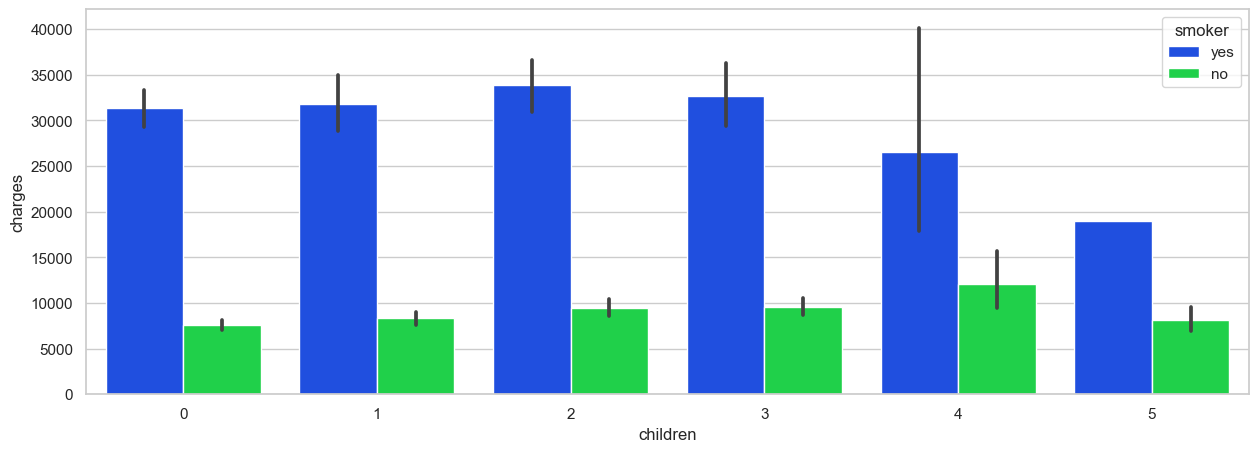

In [31]:
#Barplot with Hue Smoker
sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)

In [32]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


<AxesSubplot:xlabel='weight_status', ylabel='count'>

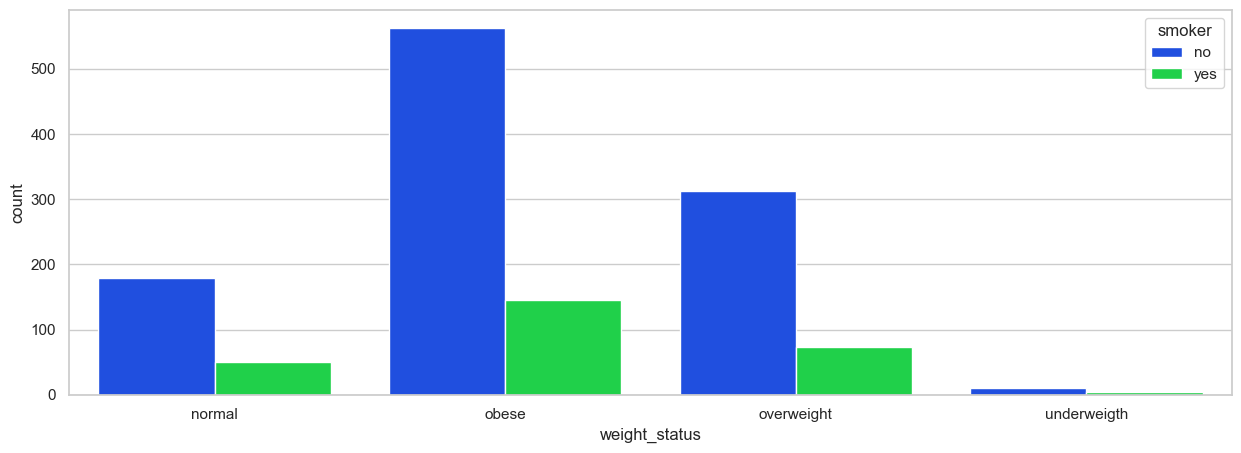

In [33]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [34]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [35]:
#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


<AxesSubplot:xlabel='weight_status', ylabel='count'>

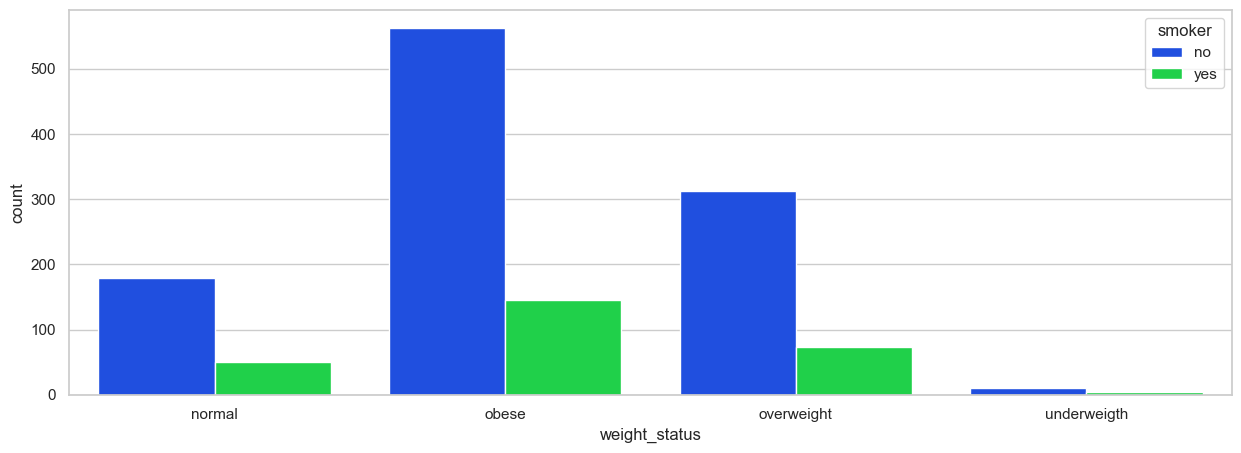

In [36]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [37]:
#Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [38]:
#Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


<AxesSubplot:xlabel='weight_status', ylabel='avg_charges'>

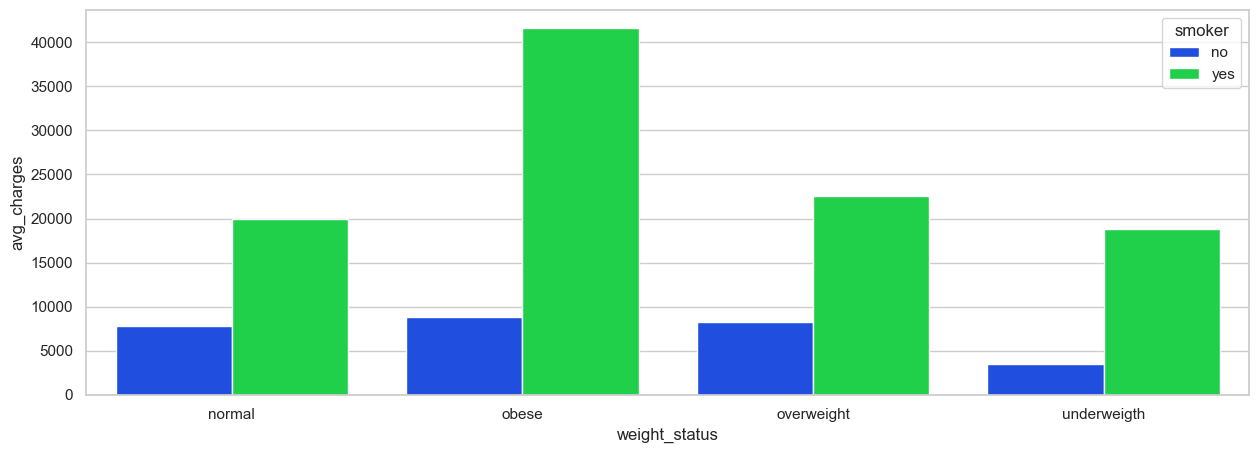

In [39]:
#Average Charges Barplot
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

# Data Processing

# Missing Values

In [40]:
#Check Missing Value
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

There are no missing values

# Duplicate Value

In [41]:
#Check Duplicate Value
df.duplicated().sum()

1

There is one duplicate value

In [42]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

# Dataset copy



In [43]:
#Copy DataFrame
dfori = df.copy()

# Feature Transformation

In [44]:
#Ordinal Encoding
dfori['smoker'] = dfori['smoker'].replace({'yes' : 0, 'no' : 1})

#One Hot Encoding
sex_ori = pd.get_dummies(dfori['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfori['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfori['weight_status'], prefix = 'status')

#Concat Feature Encoding
dfori = pd.concat([dfori, sex_ori], axis=1)
dfori = pd.concat([dfori, region_ori], axis=1)
dfori = pd.concat([dfori, status_ori], axis=1)

In [45]:
#Drop Encoded Feature
dfori = dfori.drop(columns = ['sex', 'region', 'weight_status'])

#Check df
dfori

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,1,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1,1725.55230,0,1,0,0,1,0,0,1,0,0
2,28,33.000,3,1,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,1,21984.47061,0,1,0,1,0,0,1,0,0,0
4,32,28.880,0,1,3866.85520,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0,1,0,1,0,0,0,1,0,0
1334,18,31.920,0,1,2205.98080,1,0,1,0,0,0,0,1,0,0
1335,18,36.850,0,1,1629.83350,1,0,0,0,1,0,0,1,0,0
1336,21,25.800,0,1,2007.94500,1,0,0,0,0,1,0,0,1,0


In [46]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   uint8  
 6   sex_male            1337 non-null   uint8  
 7   reg_northeast       1337 non-null   uint8  
 8   reg_northwest       1337 non-null   uint8  
 9   reg_southeast       1337 non-null   uint8  
 10  reg_southwest       1337 non-null   uint8  
 11  status_normal       1337 non-null   uint8  
 12  status_obese        1337 non-null   uint8  
 13  status_overweight   1337 non-null   uint8  
 14  status_underweigth  1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.7 K

In [47]:
#Grouping Features for Normalization
norm_ori = dfori.drop(columns = ['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweigth'],
      dtype='object')


In [48]:
#Normalization Features
for i in range(len(norm_ori)):
    dfori[norm_ori[i]] = MinMaxScaler().fit_transform(dfori[norm_ori[i]].values.reshape(len(dfori), 1))

In [49]:
#Check dfori
dfori

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,0.021739,0.321227,0.0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,1.0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Modelling

In [50]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [51]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [52]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

# Model dfori

In [53]:
#Separating Target & Features
x1 = dfori.drop(columns = ['charges']) #Features
y1 = dfori['charges'] #Target

In [54]:
#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [55]:
print(dfori['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [56]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso()
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), '\n')

Model: LinearRegression
MAE : 4302.88
RMSE : 6199.70
R2 score : 0.78
Train Accuracy : 0.7421808986032955
Test Accuracy : 0.7753807484460767
None 

Model: DecisionTree
MAE : 2769.30
RMSE : 6074.56
R2 score : 0.78
Train Accuracy : 1.0
Test Accuracy : 0.7843575719916839
None 

Model: RandomForest
MAE : 2586.65
RMSE : 4795.41
R2 score : 0.87
Train Accuracy : 0.9757289291833086
Test Accuracy : 0.8656132103523188
None 

Model: Ridge
MAE : 4311.10
RMSE : 6238.13
R2 score : 0.77
Train Accuracy : 0.7431554038170928
Test Accuracy : 0.7725878147456852
None 

Model: Lasso
MAE : 4304.22
RMSE : 6222.44
R2 score : 0.77
Train Accuracy : 0.7432010617510406
Test Accuracy : 0.7737299357175588
None 



In [57]:
prediction1

array([ 8049.77615665,  4981.26261165, 14480.0073736 , 32117.74776915,
        8829.44536821, 13241.00033433, 30440.11895653,   707.26854476,
       11154.62286016,  9926.98120512, 10459.25211665, 31884.44755974,
       31810.6396986 , 15760.10637605, 10668.09882691,  8104.25528774,
        5022.77107342, 32166.9063715 ,  2603.30597349,  3842.51123057,
        4673.13872995, 29024.05257661, 13776.61549065, 28939.49036146,
       31243.2081316 ,  6243.59067999, 34718.97033043, 37342.6205108 ,
       13008.28319021, 14646.91264867,  8024.8499611 , 12931.74590982,
         135.73669812, 10970.41983675, 37274.61381253, 12944.94580591,
        3267.09081945,  4195.25564004, 31018.17563194,  7948.00491036,
        6532.99488873, 30359.97807242, 35019.57757053, 13546.68980483,
        7663.22099195,  2666.37605782,  5576.68568425,  7279.10930068,
        3504.40790379, 10303.38856096,  7708.87012528, 10925.17440573,
       30623.04172018,  4610.60468916, 11268.72601087, 11407.9219887 ,
      

# Tuning Hyperparameter

In [75]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [76]:
#List Hyperparameters
hyperparameters = dict(
                       fit_intercept = [True, False],
                       n_jobs = [-1, 0, 1, 2],
                       normalize = [True, False],
                       copy_X = [True, False]
                      )

#Initiation
LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2')
LR_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = LR_tuned1.predict(xtest1)
evaluation(LR_tuned1, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4305.31
RMSE : 6221.51
R2 score : 0.77
Train Accuracy : 0.7432025636860959
Test Accuracy : 0.7737981066498896


In [60]:
#Check Best Hyperparameter
best_hyperparameter(LR_tuned1.best_estimator_, hyperparameters)

Best fit_intercept: False
Best n_jobs: 1
Best normalize: False
Best copy_X: False


In [61]:

alpha = [0.01, 0.1, 1, 2, 5, 10, 100]
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

Ridge1 = Ridge()
Ridge_tuned = RandomizedSearchCV(Ridge1, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
hyper_ridge = Ridge_tuned.fit(xtrain1, ytrain1)

In [62]:
prediction1 = hyper_ridge.predict(xtest1)
evaluation(hyper_ridge, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4312.37
RMSE : 6229.02
R2 score : 0.77
Train Accuracy : 0.7431790989612017
Test Accuracy : 0.7732512319942584


In [63]:
#Check Best Hyperparameter
best_hyperparameter(hyper_ridge.best_estimator_, hyperparameters)

Best alpha: 0.1
Best solver: lsqr
Best fit_intercept: True


# Conclusion

Exploratory Data Analysis

The region has an approximately balanced quantity of people who smoke and have a higher BMI, and has greater medical expenditures because the majority of people are nonsmokers and obese. Obese persons who smoke have higher charges than older people who smoke. Modeling based on predictive modelling, the Linear Regression technique outperforms the others, with MAE Score 4305.20, RMSE Score 6209.88, and R2 Score 0.77. The train and test accuracy are used to fit the Linear Regression method.

# Saving the Model

In [64]:
import joblib

In [65]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

In [67]:
pickled_model = pickle.load(open('insurance.pkl', 'rb'))
pickled_model.predict(xtest1)

array([ 8049.77615665,  4981.26261165, 14480.0073736 , 32117.74776915,
        8829.44536821, 13241.00033433, 30440.11895653,   707.26854476,
       11154.62286016,  9926.98120512, 10459.25211665, 31884.44755974,
       31810.6396986 , 15760.10637605, 10668.09882691,  8104.25528774,
        5022.77107342, 32166.9063715 ,  2603.30597349,  3842.51123057,
        4673.13872995, 29024.05257661, 13776.61549065, 28939.49036146,
       31243.2081316 ,  6243.59067999, 34718.97033043, 37342.6205108 ,
       13008.28319021, 14646.91264867,  8024.8499611 , 12931.74590982,
         135.73669812, 10970.41983675, 37274.61381253, 12944.94580591,
        3267.09081945,  4195.25564004, 31018.17563194,  7948.00491036,
        6532.99488873, 30359.97807242, 35019.57757053, 13546.68980483,
        7663.22099195,  2666.37605782,  5576.68568425,  7279.10930068,
        3504.40790379, 10303.38856096,  7708.87012528, 10925.17440573,
       30623.04172018,  4610.60468916, 11268.72601087, 11407.9219887 ,
      